<a href="https://colab.research.google.com/github/jihannurrahma/Han-Portfolio/blob/College-Project/UAS%20Numerical%20Lagrangian_Pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Periode:  2.9399999999999995


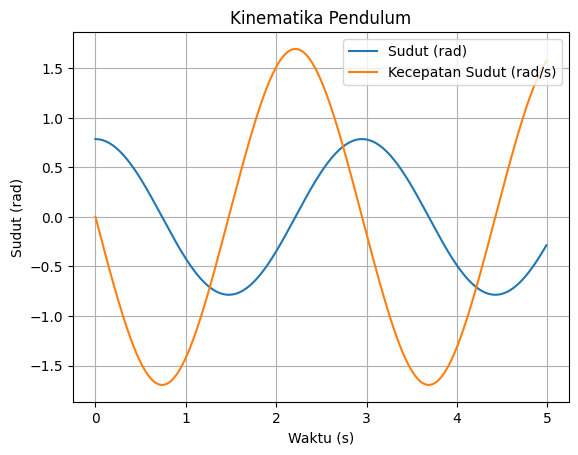

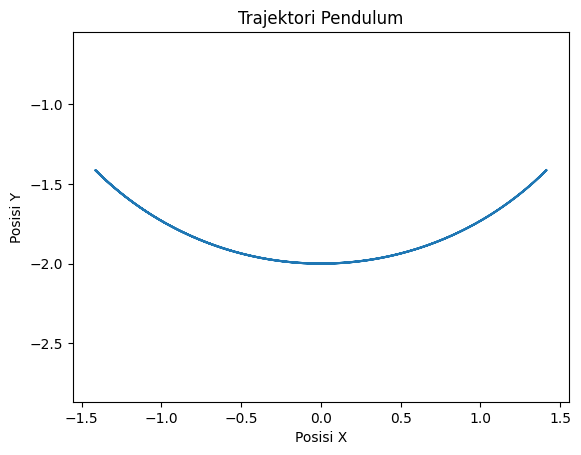

Animasi Trajektori


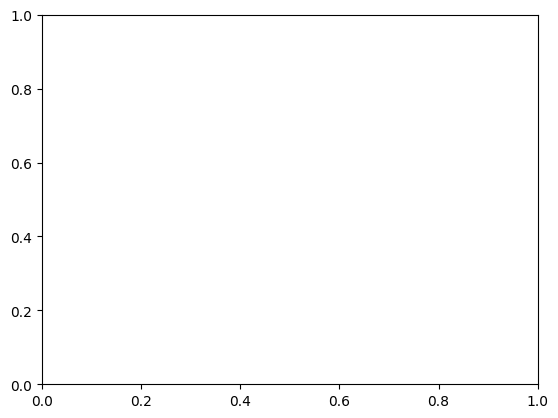

In [1]:
# Kelompok 2 Pemrograman Terstruktur
# Ananda Rossy Kurniawan (21030224033) FRD 2021
# Jihan Nurrahma Wardani (21030224028) FRD 2021
# Shela Ilmiyah (20030224015) FRD 2020
# Nafisah Nur Laila (20030224037) FRE 2020
# Lenny Intan Martila (20030224044) FRE 2020
# Lathifah Dika Mauludi (20030224051) FRE 2020
# Safira Adara Khairunnisa (20030224052)
# Riski Ramadani (20030224056) FRE 2020
# Nainunis Mutawakkillah (20030224059) FRE 2020

# Librari
from matplotlib import animation
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Inisialisasi dan Deklarasi
rnd, exp, pi, cos, sin = np.round, np.exp, np.pi, np.cos, np.sin
theta0, length, time_step, total_time = pi / 4, 2, 0.01, 5

# Penyelesaian Numerik dan Simulasi
def pendulum(theta, t, length):
    g = 9.81  # Percepatan Gravitasi Bumi
    dtheta_dt = theta[1]
    d2theta_dt2 = -g / length * sin(theta[0])
    return [dtheta_dt, d2theta_dt2]

t = np.arange(0, total_time, time_step) # Array untuk waktu
sol = odeint(pendulum, [theta0, 0], t, args=(length,)) # Solusi Numerik ODEInt

# Data Sudut dan Kecepatan Sudut dari Solusi Numerik
theta = sol[:, 0]
omega = sol[:, 1]

# Kedudukan Pendulum pada Koordinat X dan Y
x = length * sin(theta)
y = -length * cos(theta)

# Menghitung Periode
for i in range(1, len(theta)):
    if theta[i] >= 0 and theta[i-1] < 0:
        t_up = t[i]
    elif theta[i] <= 0 and theta[i-1] > 0:
        t_down = t[i]

period = 2 * (t_down - t_up) # 2πdt/dθ
print("Periode: ", period)

# Visualisasi Kinematika Pendulum
plt.plot(t, theta, label = 'Sudut (rad)')
plt.plot(t, omega, label = 'Kecepatan Sudut (rad/s)')
plt.xlabel('Waktu (s)')
plt.ylabel('Sudut (rad)')
plt.title('Kinematika Pendulum')
plt.grid(True)
plt.legend(loc = "best")
plt.show()

# Trajektori Pendulum
plt.plot(x, y)
plt.xlabel('Posisi X')
plt.ylabel('Posisi Y')
plt.title('Trajektori Pendulum')
plt.axis('equal')
plt.show()

# Animasi Trajektori
print("Animasi Trajektori")

def animate_func(i):
    ax.clear()
    ax.scatter(x[i], y[i])
    ax.plot([x[i], 0], [y[i], 0])
    ax.axis('equal')
    ax.set_title('Trajektori Pendulum\nWaktu = ' + str(rnd(t[i], decimals = 2)) + ' Sekon')
    ax.set_xlim([np.min(x) - 1, np.max(x) + 1])
    ax.set_ylim([np.min(y) - 1, 1])
    ax.set_xlabel('$X$')
    ax.set_ylabel('$Y$')

fig = plt.figure()
ax = plt.axes()
animate = animation.FuncAnimation(fig, animate_func, interval = 10, frames = len(theta))
plt.show()